#                                                ASSINGMENT 1
    

In [1]:
import warnings 
warnings.filterwarnings("ignore") 


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
h=pd.read_csv("C:\\Users\\Hi\\Downloads\\haberman.csv")

print("No. of Data points and features")
print(h.shape)  # Rows- number of points, columns- featureS

No. of Data points and features
(306, 4)


In [3]:
print(h.columns)
print("Classified as\n1-No. of pateints lived above five years\n2-No. of pateints lived below 5 years")
h["status"].value_counts()


Index(['age', 'year', 'nodes', 'status'], dtype='object')
Classified as
1-No. of pateints lived above five years
2-No. of pateints lived below 5 years


1    225
2     81
Name: status, dtype: int64

objective: To determine wheather a pateint will survive or not analysing all the 3 factors age , positive nodes and year of operation

Considering univariate analysis of all featues first according to their survival status

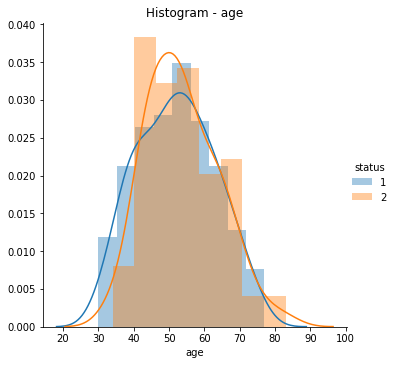

In [4]:
sns.FacetGrid(h, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram - age")
plt.show();

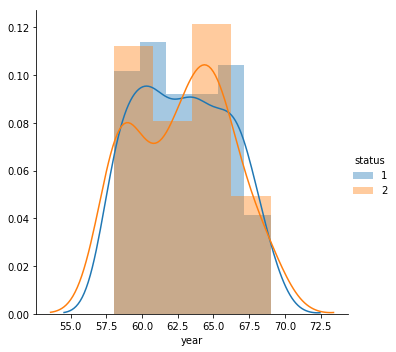

In [5]:
sns.FacetGrid(h, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

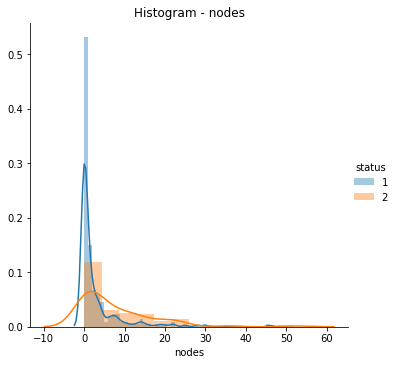

In [6]:
sns.FacetGrid(h, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Histogram - nodes")
plt.show();

Conclusion from histogram and pdf-

1) No. of nodes are helpful in telling what is the survival rate

2)lower the number of nodes detected higher is the survival chance and as the number of nodes goes on increasing, the survival rate decreases

3)age and year of operation are not very helpful in this plot to analyse survival status

In [7]:
status_1=h.loc[h["status"]==1]
status_2=h.loc[h["status"]==2]



[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


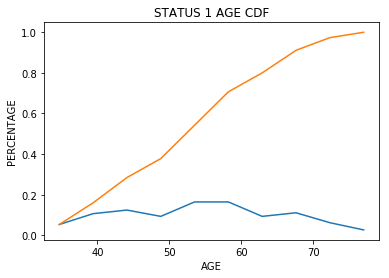

In [8]:
counts, bin_edges = np.histogram(status_1['age'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('AGE')
plt.ylabel('PERCENTAGE')

plt.title("STATUS 1 AGE CDF")




plt.show();

Observation:
    
    The percentages of people alive according to their ages are approximately as:
        
        1) below 40: 10%\n
        2) 40- 50 : 20%\n
        3) 50-60 : 30%\n
        4) 70-60 : 20%\n
        5) Above 70 years : 10%

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


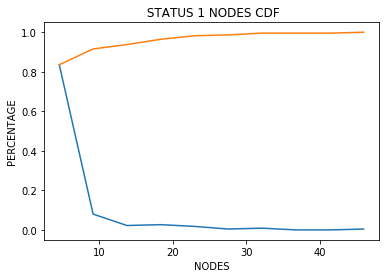

In [9]:
counts, bin_edges = np.histogram(status_1['nodes'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('NODES')
plt.ylabel('PERCENTAGE')

plt.title(" STATUS 1 NODES CDF")




plt.show();

Observation:
    
    1)From the pdf we and cdf we can see that out of the people who survived more than 5 years max percentage of people survived when number of nodes were less than 10\n
    2) nodes less than 10 - more than 80% people survived\n
    3) as number of nodes increases after 10 , of the total , less than 20% people survive

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


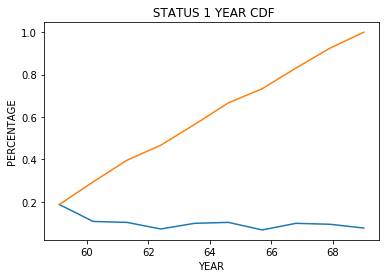

In [10]:
counts, bin_edges = np.histogram(status_1['year'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('YEAR')
plt.ylabel('PERCENTAGE')

plt.title(" STATUS 1 YEAR CDF")




plt.show();

Observation:
    
    The percentage of people who survived more than 5 years each year was nearly 10% almost uniformly

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


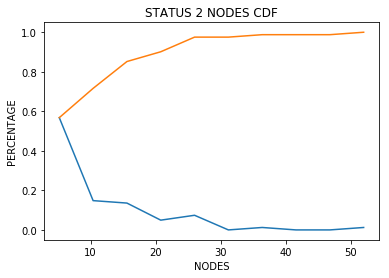

In [11]:
counts, bin_edges = np.histogram(status_2['nodes'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('NODES')
plt.ylabel('PERCENTAGE')

plt.title("STATUS 2 NODES CDF")



plt.show();

Observation:
    
    Of the total people who lived less than 5 years, approximately 60% had number of nodes less than 5
    About 10% had nodes between 5-10
    More than 20% had nodes between 10-20
    Less than 10% had nodes greater than 20

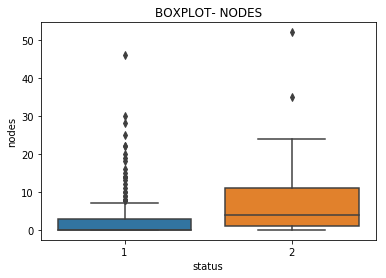

In [12]:
sns.boxplot(x='status',y='nodes', data=h)
plt.title("BOXPLOT- NODES")
plt.show()

Observation:
    
    1)Those who survived more than 5 years:
        50% of people had  about 0 nodes
        75% had nodes between 0-4
    2)Those who survived less than 5 years:
        25% of people had nodes upto 2
        50% people had nodes upto 5 
       (75-50) i.e about 25% of people had nodes 5-12
        

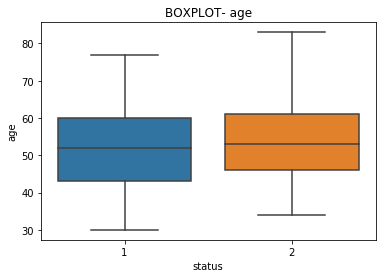

In [13]:
sns.boxplot(x='status',y='age', data=h)
plt.title("BOXPLOT- age")
plt.show()

Obseravtion:
    
    1)Those who survived more than 5 years:
        
        25% people were less than the age 44
        50% people were less than the age 53
        50-75% people were less than the age 60

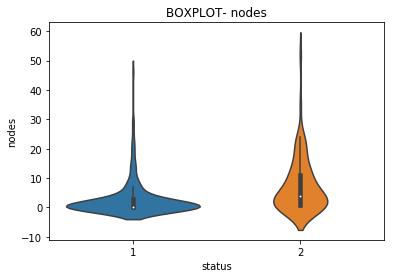

In [14]:
sns.violinplot(x="status", y="nodes", data=h, size=8)
plt.title("BOXPLOT- nodes")
plt.show()

Observation:
    
    1)From status 1:
        Max  percentage of people had  nodes 0
    2)From status 2:
        Max percentage of people had nodes between 1-10
        
        

#### MULTIVARIATE ANALYSIS:

2-D Scatter plot:

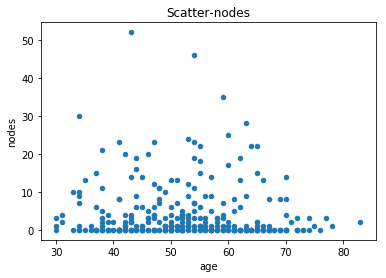

In [15]:
h.plot(kind='scatter', x='age', y='nodes') ;
plt.title("Scatter-nodes")
plt.show()

Most of the people have nodes less than 10;
Most affected age range 35-65

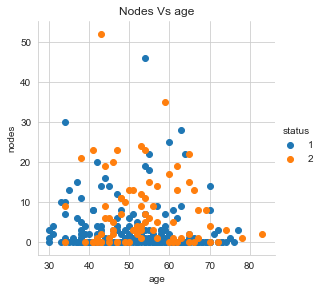

In [16]:
sns.set_style("whitegrid");
sns.FacetGrid(h, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Nodes Vs age")
plt.show();

Data is overlapping efficient conlcusion cannot be drawn

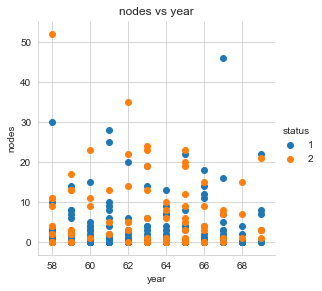

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(h, hue="status", height=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title("nodes vs year")
plt.show();

Data is overlapping clear conclusion cannot be drawn and pattern cannot be recognised properly

PAIR PLOT

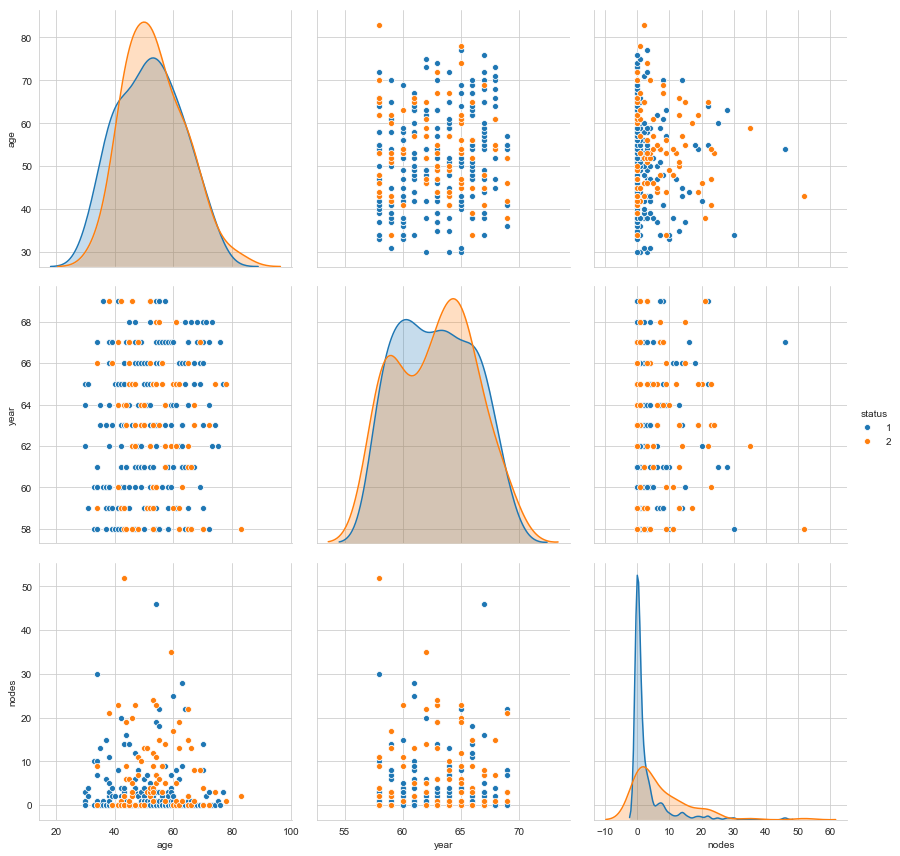

In [18]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(h, vars=['age','year','nodes'],hue="status", height=4);
plt.show()

No considerable observation can be drawn from the pair plots as patterns cannot be recognised properly

### MEAN , VARIANCE AND STANDARD DEVIATION

In [19]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("Mean of status1 age group",np.mean(status_1["age"]))
print("Mean of status1 nodes",np.mean(status_1["nodes"]))
print("Mean of status2 age group",np.mean(status_2["age"]))
print("Mean of status2 nodes",np.mean(status_2["nodes"]))

print("\nStd-dev:");
print("Standard deviation of status1 age group",np.std(status_1["age"]))
print("Standard deviation of status1 nodes",np.std(status_1["nodes"]))
print("Standard deviation of status2 age group",np.std(status_2["age"]))
print("Standard deviation of status2 nodes",np.std(status_2["nodes"]))

Means:
Mean of status1 age group 52.01777777777778
Mean of status1 nodes 2.7911111111111113
Mean of status2 age group 53.67901234567901
Mean of status2 nodes 7.45679012345679

Std-dev:
Standard deviation of status1 age group 10.98765547510051
Standard deviation of status1 nodes 5.857258449412131
Standard deviation of status2 age group 10.10418219303131
Standard deviation of status2 nodes 9.128776076761632


 Median, Percentile, Quantile, IQR, MAD

In [20]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print("Median of status1 age group",np.median(status_1["age"]))
print("Median of status1 nodes",np.median(status_1["nodes"]))
print("Median of status2 age group",np.median(status_2["age"]))
print("Median of status2 nodes",np.median(status_2["nodes"]))


print("\nQuantiles:")
print("Status1 age group",np.percentile(status_1["age"],np.arange(0, 100, 25)))
print("Status1 nodes",np.percentile(status_1["nodes"],np.arange(0, 100, 25)))
print("Status2 age group",np.percentile(status_2["age"],np.arange(0, 100, 25)))
print("Status2 nodes",np.percentile(status_2["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print("Status1 age group",np.percentile(status_1["age"],90))
print("Status1 nodes",np.percentile(status_1["nodes"],90))
print("Status2 age group",np.percentile(status_2["age"],90))
print("Status2 nodes",np.percentile(status_2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("Status1 age group",robust.mad(status_1["age"]))
print("Status1 nodes",robust.mad(status_1["nodes"]))
print("Status2 age group",robust.mad(status_2["age"]))
print("Status2 nodes",robust.mad(status_2["nodes"]))



Medians:
Median of status1 age group 52.0
Median of status1 nodes 0.0
Median of status2 age group 53.0
Median of status2 nodes 4.0

Quantiles:
Status1 age group [30. 43. 52. 60.]
Status1 nodes [0. 0. 0. 3.]
Status2 age group [34. 46. 53. 61.]
Status2 nodes [ 0.  1.  4. 11.]

90th Percentiles:
Status1 age group 67.0
Status1 nodes 8.0
Status2 age group 67.0
Status2 nodes 20.0

Median Absolute Deviation
Status1 age group 13.343419966550417
Status1 nodes 0.0
Status2 age group 11.860817748044816
Status2 nodes 5.930408874022408


## CONCLUSION:

1)Nodes are the only parameter which are helpful in analysis. 
2)If the nodes are less than 5 then their is a fare chance of survival of about 75%. 
3)Above 5 nodes and as the nodes goes on increasing the survival chances goes on decreasing